In [27]:
from utils import *

In [28]:
import matplotlib.pyplot as plt
import matplotlib

In [29]:
ds = xr.open_zarr("data/interim/c_Zint")

In [30]:
ds["c_Zint"].isel()

<xarray.DataArray 'c_Zint' (time: 80, YC: 500, XC: 600)>
dask.array<open_dataset-e2c728e30cfb2fa10dba0dc9a29c2f56c_Zint, shape=(80, 500, 600), dtype=float32, chunksize=(20, 125, 150), chunktype=numpy.ndarray>
Coordinates:
    Depth    (YC, XC) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
  * XC       (XC) float32 -16.3 -16.28 -16.27 -16.26 ... -10.32 -10.31 -10.31
  * YC       (YC) float32 53.01 53.01 53.03 53.03 ... 57.97 57.97 57.99 57.99
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(500, 600), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(500, 600), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 00:28:48 ... 1 days 13:55:12

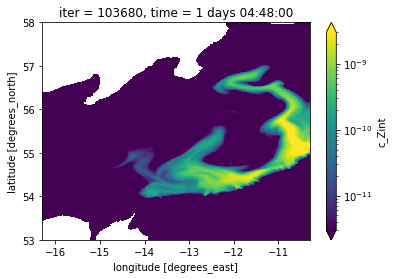

In [39]:
ds["c_Zint"].isel(time=60).plot(norm=matplotlib.colors.LogNorm(vmin=3e-12, vmax=3e-9))

In [53]:
fig = plt.figure()
p1 = plt.plot([0, 0])
plt.close(fig)
print(p1[0].remove())

None


In [50]:
ds.XC.max()

<xarray.DataArray 'XC' ()>
array(-10.305, dtype=float32)

In [83]:
import pandas as pd

In [77]:
type("3")

str

In [81]:
type(float("3"))

float

In [112]:
sample = ds["c"].isel(time=-1).sel(XC=-11.5, YC=55, method="nearest")

In [136]:
cast_num = 1
sample_dict = {
    "castnum": xr.ones_like(sample, dtype="int64")*cast_num,
    "time": xr.ones_like(sample)*sample["time"],
    "Z": sample["Z"],
    "dZ": sample["drF"],
    "c": sample
}
sample_df = pd.DataFrame(data=sample_dict)

In [137]:
df = pd.DataFrame({"castnum": [], "time": [], "Z":  [], "dZ": [], "c": [] }).append(sample_df)

In [138]:
df

,castnum,time,Z,dZ,c
0,1.0,1 days 13:55:12,-5.0,10.0,4.409413e-26
1,1.0,1 days 13:55:12,-15.0,10.0,4.410623e-26
2,1.0,1 days 13:55:12,-25.0,10.0,4.495818e-26
3,1.0,1 days 13:55:12,-35.0,10.0,4.800466e-26
4,1.0,1 days 13:55:12,-45.0,10.0,5.044233e-26
...,...,...,...,...,...
345,1.0,1 days 13:55:12,-3455.0,10.0,NaN
346,1.0,1 days 13:55:12,-3465.0,10.0,NaN
347,1.0,1 days 13:55:12,-3475.0,10.0,NaN
348,1.0,1 days 13:55:12,-3485.0,10.0,NaN


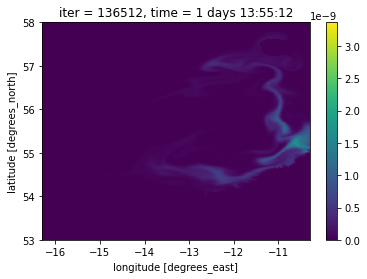

In [160]:
pc = ds["c_Zint"].isel(time=-1).plot(alpha=0.)
pc.colorbar.remove()
pc.set_array(ds["c_Zint"].isel(time=-1)/2.)
pc.set(alpha=1.);
plt.colorbar(pc)

<Axes:>

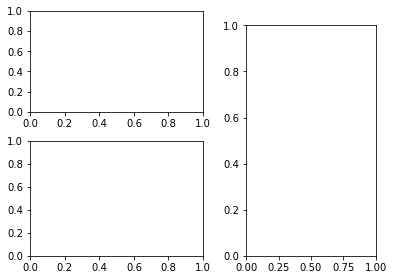

In [163]:
plt.axes([0.1, 0.6, 0.4, 0.35])
plt.axes([0.1, 0.1, 0.4, 0.4])
plt.axes([0.6, 0.1, 0.3, 0.8])

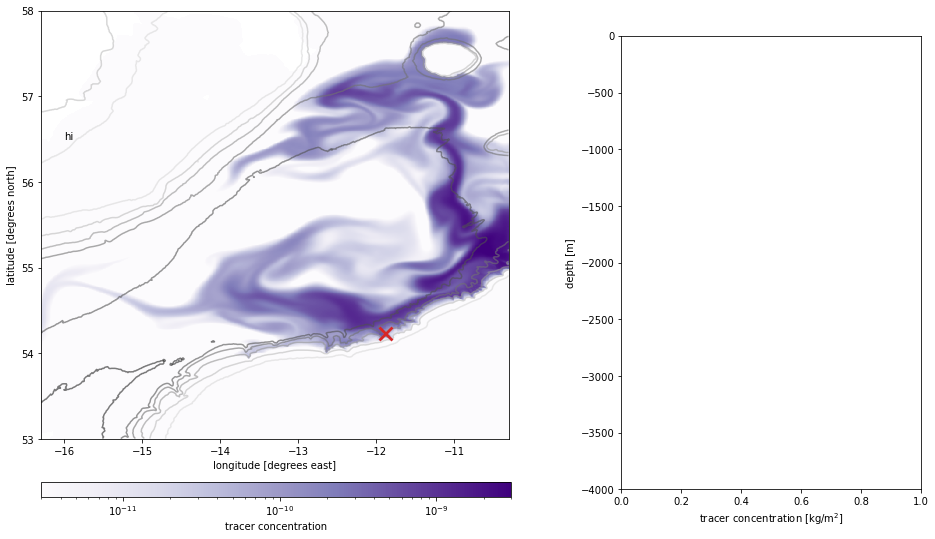

In [229]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import pandas as pd

from utils import *

ds = load_all_data()

df = pd.DataFrame({"castnum": [], "time": [], "Z":  [], "dZ": [], "c": [] })

fig = plt.figure(figsize=(13, 7))
ax = plt.axes([0, 0.15, 0.625, 0.85])

pc = ds["c_Zint"].isel(time=-1).plot(
    ax=ax, alpha=0., cmap = plt.get_cmap("Purples"),
    norm = matplotlib.colors.LogNorm(vmin=3e-12, vmax=3e-9)
)
pc.colorbar.remove()
ds["Depth"].plot.contour(ax=ax, levels=np.arange(-500, 4000, 500), cmap="Greys", alpha=0.6)
ax.set_xlabel("longitude [degrees east]")
ax.set_ylabel("latitude [degrees north]")
release = [-11.895, 54.233]
ax.plot(release[0], release[1], "C3x", markersize=13, markeredgewidth=2.75, markeredgecolor="C3")
hoverplot = ax.plot([],[])

sax = plt.axes([0.62, 0.05, 0.32, 0.9])
sax.set_ylim(-4000., 0.)

sax.set_title("")
sax.set_xlabel(r"tracer concentration [kg/m$^{2}$]")
sax.set_ylabel(r"depth [m]")

cax = plt.axes([0., 0.035, 0.5025, 0.03])
cb = plt.colorbar(pc, cax=cax, orientation="horizontal", label="tracer concentration")

pc.set(alpha=1.0)
cb.update_normal(pc)
t = 30.4
ann = ax.annotate(f"Elapsed time: {round(t/24.,1)} days", xy=(-16, 56.5))
ann.set_text("hi")

In [211]:
fig.axes[0]

<Axes:xlabel='longitude [degrees east]', ylabel='latitude [degrees north]'>

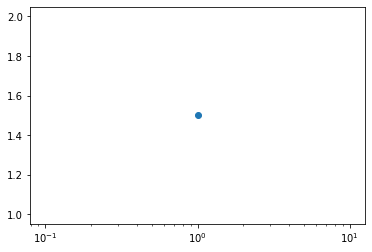

In [252]:
ax = plt.subplot()
p = plt.plot([0, 1], [1, 2], "C0o")
p[0].set_data([0, 1], [1, 1.5])


In [ ]:
plt.